In [136]:
#titanic survival predictor model

In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [138]:
data=pd.read_csv("titanic_data.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [139]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [140]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [141]:
data.shape

(891, 12)

In [142]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

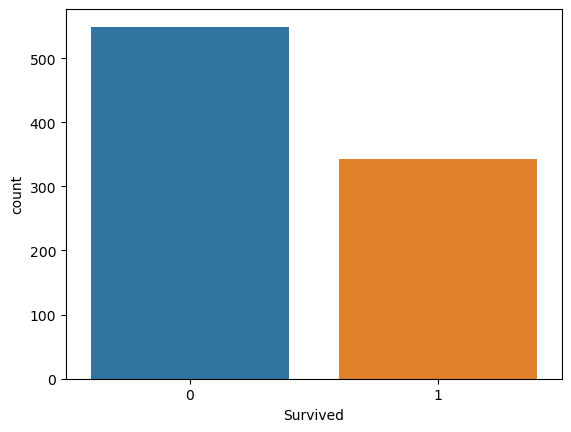

In [143]:
sns.countplot(data['Survived'])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\

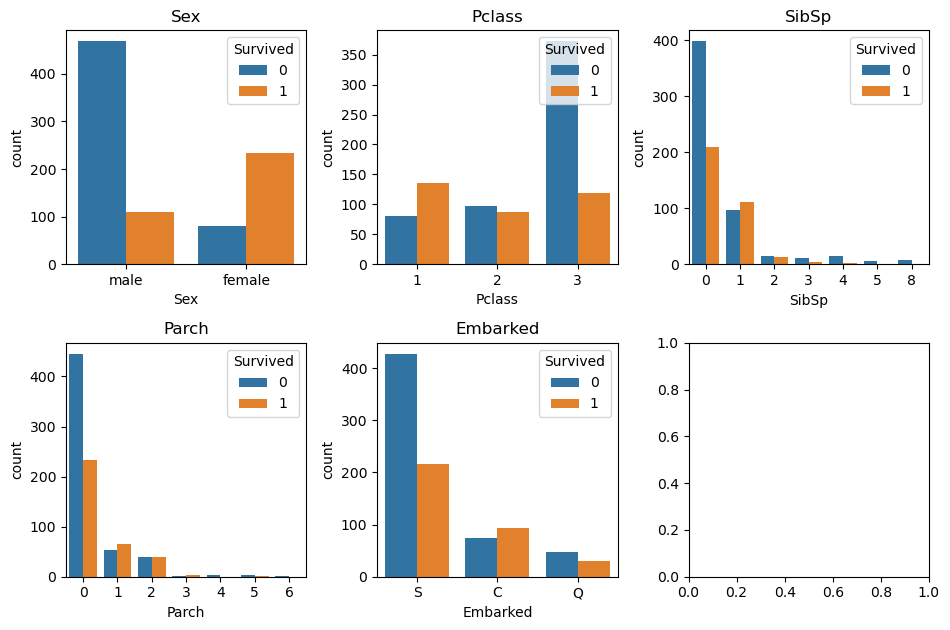

In [144]:
cols = ['Sex','Pclass','SibSp','Parch','Embarked']
n_rows=2
n_cols=3

fig, axs = plt.subplots(n_rows,n_cols,figsize=(n_cols*3.2, n_rows*3.2))

for r in range(0, n_rows):
    for c in range (0,n_cols):
        i=r*n_cols + c
        if (i==5):
            break
        ax=axs[r][c]
        sns.countplot(data[cols[i]], hue=data['Survived'], ax=ax)
        ax.set_title(cols[i])
        ax.legend(title='Survived', loc='upper right')
        
plt.tight_layout()

In [145]:
data.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [146]:
data.pivot_table('Survived',index='Sex',columns='Pclass')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

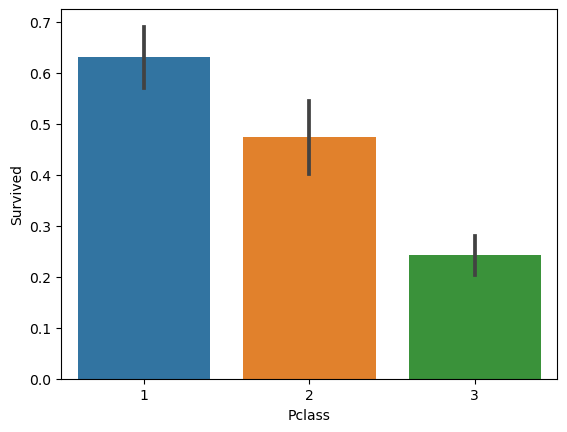

In [147]:
sns.barplot(x='Pclass',y='Survived',data=data)

In [148]:
age=pd.cut(data['Age'],[0,18,80])
data.pivot_table('Survived',['Sex',age],'Pclass')

Pclass                  1         2         3
Sex    Age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

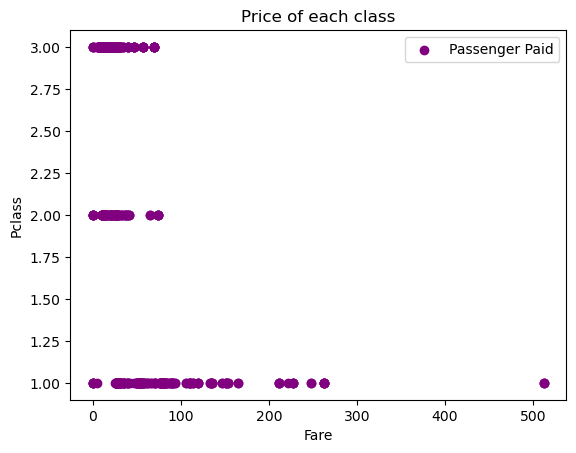

In [149]:
plt.scatter(data['Fare'],data['Pclass'],color='purple',label='Passenger Paid')
plt.ylabel('Pclass')
plt.xlabel('Fare')
plt.title('Price of each class')
plt.legend()
plt.show()

In [150]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [151]:
for val in data:
    print(data[val].value_counts())
    print()

1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64

0    549
1    342
Name: Survived, dtype: int64

3    491
1    216
2    184
Name: Pclass, dtype: int64

Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64

male      577
female    314
Name: Sex, dtype: int64

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88,

In [152]:
data= data.drop(['Name','PassengerId','Cabin','Ticket'],axis=1)

In [153]:
data= data.dropna(subset = ['Embarked','Age'])

In [154]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
889,1,1,male,26.0,0,0,30.0000,C


In [155]:
data.shape

(712, 8)

In [156]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Fare      712 non-null    float64
 7   Embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 50.1+ KB


In [158]:
print(data['Sex'].unique())
print(data['Embarked'].unique())


['male' 'female']
['S' 'C' 'Q']


In [160]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

data.iloc[:,2]=labelencoder.fit_transform(data.iloc[:,2].values)
data.iloc[:,7]=labelencoder.fit_transform(data.iloc[:,7].values)


In [161]:
print(data['Sex'].unique())
print(data['Embarked'].unique())


[1 0]
[2 0 1]


In [162]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    int32  
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Fare      712 non-null    float64
 7   Embarked  712 non-null    int32  
dtypes: float64(2), int32(2), int64(4)
memory usage: 44.5 KB


In [163]:
X=data.iloc[:,1:8].values
Y=data.iloc[:,0].values

In [164]:
#split the dataset into 80% training and 20% testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test =train_test_split(X,Y,test_size=0.2, random_state=0)

In [166]:
#scale the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)


In [173]:
#machine learning models
def models(X_train, Y_train):
    #use logistic regression
    from sklearn.linear_model import LogisticRegression
    log=LogisticRegression(random_state=0)
    log.fit(X_train,Y_train)
    
    #use knn
    from sklearn.neighbors import KNeighborsClassifier
    knn=KNeighborsClassifier(n_neighbors=5, metric='minkowski',p=2)
    knn.fit(X_train,Y_train)
    
    #use SVC (linear kernel)
    from sklearn.svm import SVC
    svc_lin=SVC(kernel='linear',random_state=0)
    svc_lin.fit(X_train,Y_train)
    
    #use SVC (RBF kernel)
    from sklearn.svm import SVC
    svc_rbf=SVC(kernel='rbf',random_state=0)
    svc_rbf.fit(X_train,Y_train)
    
    #use gaussianNB
    from sklearn.naive_bayes import GaussianNB
    gauss=GaussianNB()
    gauss.fit(X_train,Y_train)
    
    #use decision tree
    from sklearn.tree import DecisionTreeClassifier
    dtree=DecisionTreeClassifier(criterion='entropy',random_state=0)
    dtree.fit(X_train,Y_train)
    
    #use random forest
    from sklearn.ensemble import RandomForestClassifier
    forest=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
    forest.fit(X_train,Y_train)
    
    #print the training accuracy of each model
    print('[0]LogisticRegression Training Accuracy: ',log.score(X_train,Y_train))
    print('[1]KNeighbors Training Accuracy: ',knn.score(X_train,Y_train))
    print('[2]SVC_Linear Training Accuracy: ',svc_lin.score(X_train,Y_train))
    print('[3]SVC_rbf Training Accuracy: ',svc_rbf.score(X_train,Y_train))
    print('[4]GaussianNB Training Accuracy: ',gauss.score(X_train,Y_train))
    print('[5]DecisionTree Training Accuracy: ',dtree.score(X_train,Y_train))
    print('[6]RandomForest Training Accuracy: ',forest.score(X_train,Y_train))
    
    return log,knn,svc_lin,svc_rbf,gauss,dtree,forest

In [174]:
#train all models
model=models(X_train,Y_train)

[0]LogisticRegression Training Accuracy:  0.7978910369068541
[1]KNeighbors Training Accuracy:  0.8664323374340949
[2]SVC_Linear Training Accuracy:  0.7768014059753954
[3]SVC_rbf Training Accuracy:  0.8506151142355008
[4]GaussianNB Training Accuracy:  0.8031634446397188
[5]DecisionTree Training Accuracy:  0.9929701230228472
[6]RandomForest Training Accuracy:  0.9753954305799648


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [175]:
#decision tree classifier is the best of the all models on training data

In [177]:
#confusion matrix and accuracy for all the models on test data
from sklearn.metrics import confusion_matrix
for i in range (len(model)):
    cm=confusion_matrix(Y_test,model[i].predict(X_test))
    
    #extract the TN, FP, FN, TP
    TN, FP, FN, TP= cm.ravel()
    test_score=(TP + TN)/(TP + TN + FN + FP)
    print(cm)
    print('Model[{}] Testing Accuracy = "{}"'.format(i,test_score))
    print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++")


[[75  7]
 [19 42]]
Model[0] Testing Accuracy = "0.8181818181818182"
++++++++++++++++++++++++++++++++++++++++++++++++++++++++
[[67 15]
 [20 41]]
Model[1] Testing Accuracy = "0.7552447552447552"
++++++++++++++++++++++++++++++++++++++++++++++++++++++++
[[70 12]
 [18 43]]
Model[2] Testing Accuracy = "0.7902097902097902"
++++++++++++++++++++++++++++++++++++++++++++++++++++++++
[[75  7]
 [22 39]]
Model[3] Testing Accuracy = "0.7972027972027972"
++++++++++++++++++++++++++++++++++++++++++++++++++++++++
[[69 13]
 [27 34]]
Model[4] Testing Accuracy = "0.7202797202797203"
++++++++++++++++++++++++++++++++++++++++++++++++++++++++
[[54 28]
 [12 49]]
Model[5] Testing Accuracy = "0.7202797202797203"
++++++++++++++++++++++++++++++++++++++++++++++++++++++++
[[73  9]
 [14 47]]
Model[6] Testing Accuracy = "0.8391608391608392"
++++++++++++++++++++++++++++++++++++++++++++++++++++++++


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [178]:
#random forest classifier is best of all the models for testing data

In [182]:
import numpy as np
forest=model[6]
importances=pd.DataFrame({'feature':data.iloc[:,1:8].columns, 'importance':np.round(forest.feature_importances_ ,3)})
importances=importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
Age,0.300
Fare,0.296
Sex,0.183
Pclass,0.098
SibSp,0.050
Parch,0.044
Embarked,0.030


<AxesSubplot:xlabel='feature'>

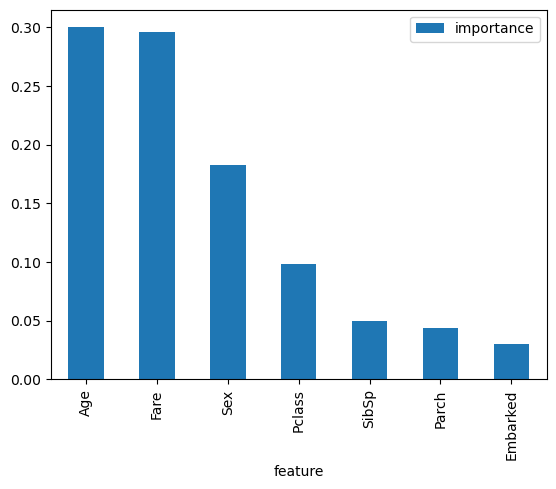

In [183]:
#visualize importance
importances.plot.bar()

In [184]:
#print the prediction of the random forest classifier
pred=model[6].predict(X_test)
print(pred)
print()
print(Y_test)

[1 0 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1
 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 0 1 1 1
 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1]

[0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1
 1 1 1 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1
 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0
 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1]
